# Linear Algebra and Its Applications
## Based on Linear Algebra and Its Applications (Fourth Edition) by Gilbert Strang

Section 1: Introduction to Linear Algebra

## <a id='introduction-to-linear-algebra'></a>1. Introduction to Linear Algebra
Linear algebra is the study of vectors, vector spaces, linear transformations, and systems of linear equations.

Section 2: Vectors and Matrices
## <a id='vectors-and-matrices'></a>2. Vectors and Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, svd
from sympy import Matrix, init_printing
from IPython.display import display, Markdown, Latex, HTML
import ipywidgets as widgets
from matplotlib.animation import FuncAnimation



# Example 1: Interactive Vectors (Scalar Multiplication and Addition)
def animate_vectors():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)
    ax.grid(True)
    
    v1 = np.array([2, 3])
    v2 = np.array([4, 1])
    
    quiver_v1 = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1, color='r')
    quiver_v2 = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=1, color='b')
    
    text = ax.text(-9, 9, '', fontsize=12)
    
    def update(frame):
        quiver_v1.set_UVC(v1[0] * frame / 20, v1[1] * frame / 20)
        quiver_v2.set_UVC(v2[0] * frame / 20, v2[1] * frame / 20)
        
        if frame <= 10:
            text.set_text(f"Scaling v1 by {frame/10:.1f}")
        else:
            text.set_text(f"Adding v1 and v2 step by step")
        
        ax.set_title(f"Frame {frame}: Scalar Multiplication & Vector Addition")
        return quiver_v1, quiver_v2, text

    ani = FuncAnimation(fig, update, frames=20, interval=200, blit=False)
    plt.close()
    return ani

ani = animate_vectors()
html_ani = ani.to_jshtml()
display(HTML(html_ani))

# print("Vector Addition:", addition)
# print("Scalar Multiplication:", scalar_multiplication)

Vector Addition: [4 6]
Scalar Multiplication: [2 4]


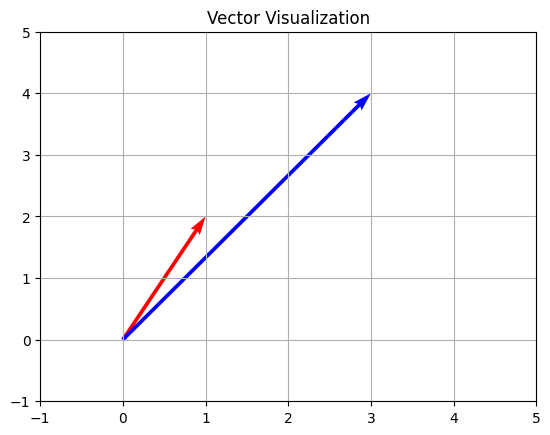

In [2]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
addition = v1 + v2
scalar_multiplication = 2 * v1

print("Vector Addition:", addition)
print("Scalar Multiplication:", scalar_multiplication)

# Visualizing Vectors
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.title("Vector Visualization")
plt.show()

## <a id='key-properties-of-matrix-multiplication'></a> Key Properties of Matrix Multiplication

In [3]:
A = np.array([[2, 3], [4, 5]])
B = np.array([[1, 0], [0, 1]])  # Identity matrix
C = np.array([[1, 2], [3, 4]])
D = np.array([[5, 6], [7, 8]])

# Associative: (AB)C = A(BC)
left_side = (A @ B) @ C
right_side = A @ (B @ C)
# display(Latex(r"""$$Associative\ Property:\\ (AB)C = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix},\\ A(BC) = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix}$$""" % tuple(np.hstack(left_side.flatten()))))
display(Latex(r"""$$Associative\ Property:\\ 
(AB)C = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix},\\ 
A(BC) = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix}$$""" % tuple(np.hstack((left_side.flatten(), right_side.flatten())))))

# Distributive: A(B + D) = AB + AD
left_dist = A @ (B + D)
right_dist = (A @ B) + (A @ D)

display(Latex(r"""$$Distributive\ Property:\\
A(B + D) = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix},\\
AB + AD = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix}$$""" % tuple(np.hstack((left_dist.flatten(), right_dist.flatten())))))

# Identity Matrix: IA = A, BI = B
I = np.eye(2)
identity_left = I @ A
identity_right = B @ I
display(Latex(r"""$$Identity\ Matrix:\\
IA = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix},\\
BI = \begin{bmatrix}%s & %s \\ %s & %s\end{bmatrix}$$""" % tuple(np.hstack((identity_left.flatten(), identity_right.flatten())))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Section 3: Solving Systems of Linear Equations

In [4]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(A, b)

print("Solution to Ax = b:", x)

Solution to Ax = b: [2. 3.]


# Section 4: LU Decomposition

In [5]:
P, L, U = lu(A)
print("Lower Triangular Matrix (L):\n", L)
print("Upper Triangular Matrix (U):\n", U)

Lower Triangular Matrix (L):
 [[1.         0.        ]
 [0.33333333 1.        ]]
Upper Triangular Matrix (U):
 [[3.         1.        ]
 [0.         1.66666667]]


# Section 5: Singular Value Decomposition (SVD)

In [6]:
U, s, Vh = svd(A)
print("Singular Values:\n", s)

Singular Values:
 [3.61803399 1.38196601]


# Section 6: Eigenvalues and Eigenvectors

In [7]:
vals, vecs = np.linalg.eig(A)
print("Eigenvalues:\n", vals)
print("Eigenvectors:\n", vecs)

Eigenvalues:
 [3.61803399 1.38196601]
Eigenvectors:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


## <a id='applications-of-special-matrices'></a> Section 7. Applications of Special Matrices

1. **Diagonalization**: Simplifies powers of matrices.
2. **LU Decomposition**: Factorizes matrix into upper & lower triangular.
3. **Graph Theory**: Adjacency matrices of graphs are often symmetric.
4. **Machine Learning**: Covariance matrices in data science are symmetric and positive semi-definite.
5. **Quantum Mechanics**: Hermitian (symmetric complex) matrices represent observable quantities.

## Summary
This notebook covers fundamental concepts in linear algebra including vectors, matrices, solving systems of equations, LU decomposition, SVD, and eigenvalues/eigenvectors and applications of special matrices.